## The Movie Dataset

Link to the data source: (https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=keywords.csv)

The data includes information on 45,000 films that were released on or before July 1, 2017. Cast, crew, budget, revenue, release dates, languages, production companies, countries, TMDB vote counts, and vote averages are among the data points. It also has files with 26 million ratings from 270,000 users for each of the 45,000 movies.

The following files are included in the dataset:

<b>movies_metadata.csv</b> : This database contains information on over 45,000 films. Budget, revenue, release dates, languages, production countries, and companies are among the features.

<b>credits.csv</b> : This file contains cast and crew information for all the movies.

<b>ratings.csv</b> : This file contains 26 million ratings for all the 45,000 movies from 270,000 users.

<b>Locating data files:</b>
 - raw data : data/raw/
 - cleaned data : data/cleaned/

In [1]:
## IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt
from numerize import numerize

## Cleaning - movies_metadata.csv

In [2]:
df_movies = pd.read_csv('data/raw/movies_metadata.csv')

/var/folders/yt/ytb84x3912v3lt1mnky6k2vw0000gn/T/ipykernel_39782/299731447.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv('data/raw/movies_metadata.csv')


#### PHASE 1 : Cleaning - movies_metadata.csv 
- Data Exploration : getting to know the data
- Data Preprocessing : bringing data to usuable form
- Features engineering : creating innovative features (columns) using available columns to derive maximum value

In [3]:
df_movies.shape

(45466, 24)

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
df_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
df_movies['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

#### Since the 'Adult' column specifies whether a is adult rated or not it makes more sense to convert this column to boolean data type than storing it as string in which it currently is.

In [7]:
df_movies = df_movies[df_movies['adult'].isin(['True', 'False'])]
df_movies['adult'] = df_movies['adult'].astype('bool')

In [8]:
df_movies[['belongs_to_collection']]

,belongs_to_collection
0,"{'id': 10194, 'name': 'Toy Story Collection', ..."
1,NaN
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
3,NaN
4,"{'id': 96871, 'name': 'Father of the Bride Col..."
...,...
45461,NaN
45462,NaN
45463,NaN
45464,NaN


#### I see that the 'belongs_to_collection' column contains values in the form of a string json, making it difficult to use for analysis purposes. Hence, I used regular expressions to extract the relevant data from the string json.

In [9]:
def extract_collection(string):
#     reg = r"'name': '(.*?)'"
    reg = r"'name': '(.*?)'|'name': \"(.*?)\""
    collections = re.findall(reg, str(string))
    collections_new = ["".join(c) for c in collections]
    
    return "" + '|'.join(collections_new)    

df_movies['belongs_to_collections_new'] = df_movies['belongs_to_collection'].apply(extract_collection)
df_movies[['belongs_to_collection', 'belongs_to_collections_new']]

,belongs_to_collection,belongs_to_collections_new
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",Toy Story Collection
1,NaN,
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",Grumpy Old Men Collection
3,NaN,
4,"{'id': 96871, 'name': 'Father of the Bride Col...",Father of the Bride Collection
...,...,...
45461,NaN,
45462,NaN,
45463,NaN,
45464,NaN,


#### Here, I am adding some derived columns to the dataset like 'profit_loss', 'profit_loss_pct', 'profit/loss' using available 'budget' and 'revenue' columns to better understand the profitability of movies.

In [10]:
df_movies['budget'] = df_movies['budget'].astype(float)
df_movies['revenue'] = df_movies['revenue'].astype(float)
df_movies['budget'] = df_movies['budget'].replace(0, np.nan)
df_movies['revenue'] = df_movies['revenue'].replace(0, np.nan)

df_movies['profit_loss'] = df_movies['revenue'] - df_movies['budget']
df_movies['profit_loss_pct'] = df_movies['profit_loss']*100/df_movies['budget']
df_movies['profit/loss'] = df_movies['profit_loss'].apply(lambda x : 'PROFIT' if x > 0 else ('LOSS' if x < 0 else ''))

df_movies[['budget', 'revenue', 'profit_loss', 'profit_loss_pct', 'profit/loss']]

,budget,revenue,profit_loss,profit_loss_pct,profit/loss
0,30000000.0,373554033.0,343554033.0,1145.180110,PROFIT
1,65000000.0,262797249.0,197797249.0,304.303460,PROFIT
2,NaN,NaN,NaN,NaN,
3,16000000.0,81452156.0,65452156.0,409.075975,PROFIT
4,NaN,76578911.0,NaN,NaN,
...,...,...,...,...,...
45461,NaN,NaN,NaN,NaN,
45462,NaN,NaN,NaN,NaN,
45463,NaN,NaN,NaN,NaN,
45464,NaN,NaN,NaN,NaN,


In [11]:
df_movies['genres']

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45463, dtype: object

#### Again like above, the 'genres' column contains data in the form of string-json, hence I applied regular expressions to extract the relevant data in a usuable format.

In [12]:
def extract_genres(string):
    
    reg = r"'name': '(.*?)'|'name': \"(.*?)\""
    genres = re.findall(reg, str(string))
    genres_new = ["".join(g) for g in genres]
    
    return "" + '|'.join(genres_new)

df_movies['genres_new'] = df_movies['genres'].apply(extract_genres)
df_movies[['genres', 'genres_new']]

,genres,genres_new
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Animation|Comedy|Family
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Adventure|Fantasy|Family
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Romance|Comedy
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Comedy|Drama|Romance
4,"[{'id': 35, 'name': 'Comedy'}]",Comedy
...,...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Drama|Family
45462,"[{'id': 18, 'name': 'Drama'}]",Drama
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Action|Drama|Thriller
45464,[],


In [13]:
df_movies['original_language']

0        en
1        en
2        en
3        en
4        en
         ..
45461    fa
45462    tl
45463    en
45464    en
45465    en
Name: original_language, Length: 45463, dtype: object

#### I see that 'original language' stores the language information of the movies but in short form making it difficult to understand. Thus, to avoid confusion and increase readability, I created an excel file ('Language.xlsx') storing language abbreviations along with their full forms and mapped to the movie data set.

In [14]:
df_languages = pd.read_excel('data/raw/Languages.xlsx')
df_languages.head()

,Language,Abbreviation
0,Afar,aa
1,Abkhazian,ab
2,Avestan,ae
3,Afrikaans,af
4,Akan,ak


In [15]:
df_movies = df_movies.merge(df_languages, how='left', left_on='original_language', right_on='Abbreviation')
df_movies = df_movies.drop(['Abbreviation'], axis=1)

df_movies[['original_language', 'Language']]

,original_language,Language
0,en,English
1,en,English
2,en,English
3,en,English
4,en,English
...,...,...
45458,fa,Persian
45459,tl,Tagalog
45460,en,English
45461,en,English


In [16]:
df_movies['popularity'] = df_movies['popularity'].replace("", 0)
df_movies['popularity'] = df_movies['popularity'].astype(float)
df_movies['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

#### Based on the 'popularity' value, I created a new column called 'popularity_bucket' to bucket movies within the same popularity range.

In [17]:
def get_popularity_bucket(popularity):
    if popularity<=1:
        return 1
    elif popularity<=2:
        return 2
    elif popularity<=3:
        return 3
    elif popularity<=4:
        return 4
    else:
        return 5

df_movies['popularity_bucket'] = df_movies['popularity'].apply(get_popularity_bucket)

#### Again, 'production_companies' and 'production_countries' columns contain data in the form of string-json, so I applied regular expressions to extract the relevant data.

In [18]:
def extract_production_company(string):
    
    reg = r"'name': '(.*?)'|'name': \"(.*?)\""
    pcs = re.findall(reg, str(string))
    pcs_new = ["".join(p) for p in pcs]
    
    return "" + '|'.join(pcs_new)


df_movies['production_companies_new'] = df_movies['production_companies'].apply(extract_production_company)
df_movies[['production_companies', 'production_companies_new']]

,production_companies,production_companies_new
0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",Pixar Animation Studios
1,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",TriStar Pictures|Teitler Film|Interscope Commu...
2,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",Warner Bros.|Lancaster Gate
3,[{'name': 'Twentieth Century Fox Film Corporat...,Twentieth Century Fox Film Corporation
4,"[{'name': 'Sandollar Productions', 'id': 5842}...",Sandollar Productions|Touchstone Pictures
...,...,...
45458,[],
45459,"[{'name': 'Sine Olivia', 'id': 19653}]",Sine Olivia
45460,"[{'name': 'American World Pictures', 'id': 6165}]",American World Pictures
45461,"[{'name': 'Yermoliev', 'id': 88753}]",Yermoliev


In [19]:
def extract_production_countries(string):
    
    reg = r"'name': '(.*?)'|'name': \"(.*?)\""
    pcs = re.findall(reg, str(string))
    pcs_new = ["".join(p) for p in pcs]
    
    return "" + '|'.join(pcs_new)

df_movies['production_countries_new'] = df_movies['production_countries'].apply(extract_production_countries)
df_movies[['production_countries', 'production_countries_new']]

,production_countries,production_countries_new
0,"[{'iso_3166_1': 'US', 'name': 'United States o...",United States of America
1,"[{'iso_3166_1': 'US', 'name': 'United States o...",United States of America
2,"[{'iso_3166_1': 'US', 'name': 'United States o...",United States of America
3,"[{'iso_3166_1': 'US', 'name': 'United States o...",United States of America
4,"[{'iso_3166_1': 'US', 'name': 'United States o...",United States of America
...,...,...
45458,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",Iran
45459,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",Philippines
45460,"[{'iso_3166_1': 'US', 'name': 'United States o...",United States of America
45461,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",Russia


#### Here, I converted the 'release_date' column into pandas datetime format. Also, I created separate columns for realease year and month to enable analysis at yearly and monthly levels respectively.

In [20]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['release_year'] = df_movies['release_date'].dt.year
df_movies['release_year'] = df_movies['release_year'].apply(lambda x : np.nan if pd.isna(x) else str(x)[:-2])
df_movies['release_month'] = df_movies['release_date'].dt.month_name()
df_movies[['release_date', 'release_year', 'release_month']]

,release_date,release_year,release_month
0,1995-10-30,1995,October
1,1995-12-15,1995,December
2,1995-12-22,1995,December
3,1995-12-22,1995,December
4,1995-02-10,1995,February
...,...,...,...
45458,NaT,NaN,NaN
45459,2011-11-17,2011,November
45460,2003-08-01,2003,August
45461,1917-10-21,1917,October


In [21]:
df_movies.replace(0, np.nan, inplace=True)
df_movies['runtime'].describe()

count    43645.000000
mean        97.488303
std         34.644505
min          1.000000
25%         86.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

#### Again, the 'spoken_languages' column contains data in the form of string-json, so I applied regular expressions to extract the relevant data.

In [22]:
def extract_spoken_languages(string):
    
    reg = r"'name': '(.*?)'|'name': \"(.*?)\""
    sls = re.findall(reg, str(string))
    sls_new = ["".join(s) for s in sls]
    
    return "" + '|'.join(sls_new)

df_movies['spoken_languages_new'] = df_movies['spoken_languages'].apply(extract_spoken_languages)
df_movies[['spoken_languages', 'spoken_languages_new']]

,spoken_languages,spoken_languages_new
0,"[{'iso_639_1': 'en', 'name': 'English'}]",English
1,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",English|Français
2,"[{'iso_639_1': 'en', 'name': 'English'}]",English
3,"[{'iso_639_1': 'en', 'name': 'English'}]",English
4,"[{'iso_639_1': 'en', 'name': 'English'}]",English
...,...,...
45458,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",فارسی
45459,"[{'iso_639_1': 'tl', 'name': ''}]",
45460,"[{'iso_639_1': 'en', 'name': 'English'}]",English
45461,[],


In [23]:
df_movies['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [24]:
df_movies[['vote_average', 'vote_count']].isna().sum()

vote_average    3001
vote_count      2902
dtype: int64

In [25]:
pd.set_option('display.max_columns', None)

#### Here I am re-arranging the columns (bringing similar columns together) to incresae readability.

In [26]:
df_movies = df_movies[['id',
                       'original_title',
                       'title',
                       'belongs_to_collections_new',
                       'production_companies_new',
                       'production_countries_new',
                       'genres_new',
                       'release_date',
                       'release_year', 
                       'release_month',
                       'runtime',
                       'original_language',
                       'Language',
                       'spoken_languages_new',
                       'status',
                       'adult', 
                       'budget',
                       'revenue',
                       'profit_loss',
                       'profit_loss_pct',
                       'profit/loss',
                       'popularity',
                       'popularity_bucket',
                       'vote_count',
                       'vote_average']]

df_movies.head()

,id,original_title,title,belongs_to_collections_new,production_companies_new,production_countries_new,genres_new,release_date,release_year,release_month,runtime,original_language,Language,spoken_languages_new,status,adult,budget,revenue,profit_loss,profit_loss_pct,profit/loss,popularity,popularity_bucket,vote_count,vote_average
0,862,Toy Story,Toy Story,Toy Story Collection,Pixar Animation Studios,United States of America,Animation|Comedy|Family,1995-10-30,1995,October,81.0,en,English,English,Released,True,30000000.0,373554033.0,343554033.0,1145.180110,PROFIT,21.946943,5,5415.0,7.7
1,8844,Jumanji,Jumanji,,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,Adventure|Fantasy|Family,1995-12-15,1995,December,104.0,en,English,English|Français,Released,True,65000000.0,262797249.0,197797249.0,304.303460,PROFIT,17.015539,5,2413.0,6.9
2,15602,Grumpier Old Men,Grumpier Old Men,Grumpy Old Men Collection,Warner Bros.|Lancaster Gate,United States of America,Romance|Comedy,1995-12-22,1995,December,101.0,en,English,English,Released,True,NaN,NaN,NaN,NaN,,11.712900,5,92.0,6.5
3,31357,Waiting to Exhale,Waiting to Exhale,,Twentieth Century Fox Film Corporation,United States of America,Comedy|Drama|Romance,1995-12-22,1995,December,127.0,en,English,English,Released,True,16000000.0,81452156.0,65452156.0,409.075975,PROFIT,3.859495,4,34.0,6.1
4,11862,Father of the Bride Part II,Father of the Bride Part II,Father of the Bride Collection,Sandollar Productions|Touchstone Pictures,United States of America,Comedy,1995-02-10,1995,February,106.0,en,English,English,Released,True,NaN,76578911.0,NaN,NaN,,8.387519,5,173.0,5.7


In [27]:
df_movies[df_movies['id'].duplicated()]

,id,original_title,title,belongs_to_collections_new,production_companies_new,production_countries_new,genres_new,release_date,release_year,release_month,runtime,original_language,Language,spoken_languages_new,status,adult,budget,revenue,profit_loss,profit_loss_pct,profit/loss,popularity,popularity_bucket,vote_count,vote_average
1465,105045,Das Versprechen,The Promise,,Studio Babelsberg|Centre National de la Cinéma...,Germany,Drama|Romance,1995-02-16,1995,February,115.0,de,German,Deutsch,Released,True,NaN,NaN,NaN,NaN,,0.122178,1,1.0,5.0
9165,5511,Le Samouraï,Le Samouraï,,Fida cinematografica|Compagnie Industrielle et...,France|Italy,Crime|Drama|Thriller,1967-10-25,1967,October,105.0,fr,French,Français,Released,True,NaN,39481.0,NaN,NaN,,9.091288,5,187.0,7.9
9327,23305,The Warrior,The Warrior,,Filmfour,France|Germany|India|United Kingdom,Adventure|Animation|Drama|Action|Foreign,2001-09-23,2001,September,86.0,en,English,हिन्दी,Released,True,NaN,NaN,NaN,NaN,,1.967992,2,15.0,6.3
12066,14788,Bubble,Bubble,,Magnolia Pictures|Extension 765,United States of America,Drama|Crime|Mystery,2005-09-03,2005,September,73.0,en,English,English,Released,True,1600000.0,NaN,NaN,NaN,,3.008299,4,36.0,6.4
13375,141971,Blackout,Blackout,,Filmiteollisuus Fine,Finland,Thriller|Mystery,2008-12-26,2008,December,108.0,fi,Finnish,suomi,Released,True,NaN,NaN,NaN,NaN,,0.411949,1,3.0,6.7
15074,22649,A Farewell to Arms,A Farewell to Arms,,Paramount Pictures,United States of America,Drama|Romance|War,1932-12-08,1932,December,89.0,en,English,English,Released,True,4.0,25.0,21.0,525.000000,PROFIT,2.411191,3,29.0,6.2
15765,13209,Offside,Offside,,Jafar Panahi Film Productions,Iran,Drama|Comedy|Foreign,2006-05-26,2006,May,93.0,fa,Persian,فارسی,Released,True,2500.0,NaN,NaN,NaN,,1.529879,2,27.0,6.7
16764,141971,Blackout,Blackout,,Filmiteollisuus Fine,Finland,Thriller|Mystery,2008-12-26,2008,December,108.0,fi,Finnish,suomi,Released,True,NaN,NaN,NaN,NaN,,0.411949,1,3.0,6.7
20842,77221,Black Gold,Black Gold,,France 2 Cinéma|Quinta Communications|Carthago...,France|Italy|Qatar|Tunisia,Adventure|Drama,2011-12-21,2011,December,130.0,en,English,English,Released,True,40000000.0,5446000.0,-34554000.0,-86.385000,LOSS,6.475665,5,77.0,5.9
20898,109962,Rich and Famous,Rich and Famous,,Metro-Goldwyn-Mayer (MGM)|Jaquet,United States of America,Drama,1981-09-23,1981,September,115.0,en,English,English,Released,True,NaN,NaN,NaN,NaN,,10.396878,5,7.0,4.9


In [28]:
df_movies[df_movies['id'] == '12600']

,id,original_title,title,belongs_to_collections_new,production_companies_new,production_countries_new,genres_new,release_date,release_year,release_month,runtime,original_language,Language,spoken_languages_new,status,adult,budget,revenue,profit_loss,profit_loss_pct,profit/loss,popularity,popularity_bucket,vote_count,vote_average
5535,12600,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,Pokémon 4Ever: Celebi - Voice of the Forest,Pokémon Collection,,Japan|United States of America,Adventure|Fantasy|Animation|Science Fiction|Fa...,2001-07-06,2001,July,75.0,ja,Japanese,日本語,Released,True,NaN,28023563.0,NaN,NaN,,7.072301,5,82.0,5.7
44823,12600,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,Pokémon 4Ever: Celebi - Voice of the Forest,Pokémon Collection,,Japan|United States of America,Adventure|Fantasy|Animation|Science Fiction|Fa...,2001-07-06,2001,July,75.0,ja,Japanese,日本語,Released,True,NaN,28023563.0,NaN,NaN,,6.080108,5,82.0,5.7


#### I notice there are some duplicate movie records in the dataset so I have dropped them to eliminate redundancy.

In [29]:
df_movies = df_movies.drop_duplicates(subset = ['id']).reset_index(drop=True)
df_movies[df_movies['id'].duplicated()]

,id,original_title,title,belongs_to_collections_new,production_companies_new,production_countries_new,genres_new,release_date,release_year,release_month,runtime,original_language,Language,spoken_languages_new,status,adult,budget,revenue,profit_loss,profit_loss_pct,profit/loss,popularity,popularity_bucket,vote_count,vote_average


#### This is how the cleaned version of "movies_metadata.csv" looks like after Phase 1

In [30]:
df_movies.head()

,id,original_title,title,belongs_to_collections_new,production_companies_new,production_countries_new,genres_new,release_date,release_year,release_month,runtime,original_language,Language,spoken_languages_new,status,adult,budget,revenue,profit_loss,profit_loss_pct,profit/loss,popularity,popularity_bucket,vote_count,vote_average
0,862,Toy Story,Toy Story,Toy Story Collection,Pixar Animation Studios,United States of America,Animation|Comedy|Family,1995-10-30,1995,October,81.0,en,English,English,Released,True,30000000.0,373554033.0,343554033.0,1145.180110,PROFIT,21.946943,5,5415.0,7.7
1,8844,Jumanji,Jumanji,,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,Adventure|Fantasy|Family,1995-12-15,1995,December,104.0,en,English,English|Français,Released,True,65000000.0,262797249.0,197797249.0,304.303460,PROFIT,17.015539,5,2413.0,6.9
2,15602,Grumpier Old Men,Grumpier Old Men,Grumpy Old Men Collection,Warner Bros.|Lancaster Gate,United States of America,Romance|Comedy,1995-12-22,1995,December,101.0,en,English,English,Released,True,NaN,NaN,NaN,NaN,,11.712900,5,92.0,6.5
3,31357,Waiting to Exhale,Waiting to Exhale,,Twentieth Century Fox Film Corporation,United States of America,Comedy|Drama|Romance,1995-12-22,1995,December,127.0,en,English,English,Released,True,16000000.0,81452156.0,65452156.0,409.075975,PROFIT,3.859495,4,34.0,6.1
4,11862,Father of the Bride Part II,Father of the Bride Part II,Father of the Bride Collection,Sandollar Productions|Touchstone Pictures,United States of America,Comedy,1995-02-10,1995,February,106.0,en,English,English,Released,True,NaN,76578911.0,NaN,NaN,,8.387519,5,173.0,5.7


#### PHASE 2 : Cleaning - movies_metadata.csv 
- Revisting the output of PHASE 1 for additional data cleaning, preprocessing and exploration

#### I see that both 'original_title' and 'title' columns store information about the movie title so I decided to drop 'original_title' column as it contained values in different langauges

In [31]:
df_movies[df_movies['original_title'] != df_movies['title']][['original_title', 'title']]

,original_title,title
28,La Cité des Enfants Perdus,The City of Lost Children
29,摇啊摇，摇到外婆桥,Shanghai Triad
32,"Guillaumet, les ailes du courage",Wings of Courage
57,Il postino,The Postman
58,Le confessionnal,The Confessional
...,...,...
45420,Maa,Mom
45422,San Michele aveva un gallo,St. Michael Had a Rooster
45428,رگ خواب,Subdue
45429,Siglo ng Pagluluwal,Century of Birthing


#### Further, it can be seen that "original_title" column had no null values but the "title" column which I have decided to keep has 3 null values. As this number is very small compared to the size of the dataset, I decided to drop the "original_title" column.

In [32]:
df_movies[['original_title', 'title']].isna().sum()

original_title    0
title             3
dtype: int64

In [33]:
df_movies.drop(['original_title'], axis=1, inplace=True)

In [34]:
df_movies['belongs_to_collections_new'].value_counts()

                                 40945
The Bowery Boys                     29
Totò Collection                     27
James Bond Collection               26
Zatôichi: The Blind Swordsman       26
                                 ...  
Glass Tiger collection               1
Kathleen Madigan Collection          1
The Big Bottom Box                   1
Joséphine - Saga                     1
Red Lotus Collection                 1
Name: belongs_to_collections_new, Length: 1696, dtype: int64

In [35]:
# Function prints % of rows containing na values for a particular column
def get_fill_rate(col):
    col_na = (df_movies[(df_movies[col] == "") | (pd.isna(df_movies[col]))].shape[0]/df_movies.shape[0])*100
    col_na = round(col_na,2)
    print(f'Column {col} does not contain values present for {col_na}% rows')

In [36]:
get_fill_rate('belongs_to_collections_new')

Column belongs_to_collections_new does not contain values present for 90.12% rows


In [37]:
df_movies.drop(['belongs_to_collections_new'], axis=1, inplace=True)

#### I dropped "belongs_to_collections_new" column as about 90% of the rows are null for this column

In [38]:
df_movies[['production_companies_new', 'production_countries_new']]

,production_companies_new,production_countries_new
0,Pixar Animation Studios,United States of America
1,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America
2,Warner Bros.|Lancaster Gate,United States of America
3,Twentieth Century Fox Film Corporation,United States of America
4,Sandollar Productions|Touchstone Pictures,United States of America
...,...,...
45428,,Iran
45429,Sine Olivia,Philippines
45430,American World Pictures,United States of America
45431,Yermoliev,Russia


In [39]:
get_fill_rate('production_companies_new')
get_fill_rate('production_countries_new')

Column production_companies_new does not contain values present for 26.13% rows
Column production_countries_new does not contain values present for 13.83% rows


#### I see that some columns like production company, production country, genre and spoken language contain multiple values for the same movie. Hence, to avoid data redundancy I have removed these columns from the movie dataset and created a new dataset for each of them with movie_id as the foreign key.

In [40]:
def split_multi_values(col):
    
    output = []
    
    for index, row in df_movies[['id', 'title', col]].iterrows():
        movie_id = row['id']
        movie_title = row['title']
        multi_str = row[col]

        if multi_str != "":
            multi_list = multi_str.split("|")
            for val in multi_list:
                output.append([movie_id, movie_title, val.strip()])
                
    return output

In [41]:
production_companies = split_multi_values('production_companies_new')
df_production_companies = pd.DataFrame(production_companies, columns=['MOVIE_ID', 'TITLE', 'PRODUCTION_COMPANY'])
df_production_companies.drop_duplicates(inplace=True)

production_countries = split_multi_values('production_countries_new')
df_production_countries = pd.DataFrame(production_countries, columns=['MOVIE_ID', 'TITLE', 'PRODUCTION_COUNTRY'])
df_production_countries.drop_duplicates(inplace=True)

df_movies.drop(['production_companies_new', 'production_countries_new'], axis=1, inplace=True)

#### This is how the new datatset for the multi-valued columns look like

In [42]:
df_production_companies.head()

,MOVIE_ID,TITLE,PRODUCTION_COMPANY
0,862,Toy Story,Pixar Animation Studios
1,8844,Jumanji,TriStar Pictures
2,8844,Jumanji,Teitler Film
3,8844,Jumanji,Interscope Communications
4,15602,Grumpier Old Men,Warner Bros.


In [43]:
df_production_countries.head()

,MOVIE_ID,TITLE,PRODUCTION_COUNTRY
0,862,Toy Story,United States of America
1,8844,Jumanji,United States of America
2,15602,Grumpier Old Men,United States of America
3,31357,Waiting to Exhale,United States of America
4,11862,Father of the Bride Part II,United States of America


In [44]:
df_movies['genres_new']

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
45428                Drama|Family
45429                       Drama
45430       Action|Drama|Thriller
45431                            
45432                            
Name: genres_new, Length: 45433, dtype: object

In [45]:
get_fill_rate('genres_new')

Column genres_new does not contain values present for 5.37% rows


In [46]:
genres = split_multi_values('genres_new')
df_genres = pd.DataFrame(genres, columns=['MOVIE_ID', 'TITLE', 'GENRES'])
df_genres.drop_duplicates(inplace=True)

df_movies.drop(['genres_new'], axis=1, inplace=True)

In [47]:
df_genres.head()

,MOVIE_ID,TITLE,GENRES
0,862,Toy Story,Animation
1,862,Toy Story,Comedy
2,862,Toy Story,Family
3,8844,Jumanji,Adventure
4,8844,Jumanji,Fantasy


In [48]:
get_fill_rate('release_date')
get_fill_rate('runtime')

Column release_date does not contain values present for 0.19% rows
Column runtime does not contain values present for 4.0% rows


In [49]:
df_movies[['original_language', 'Language']]

,original_language,Language
0,en,English
1,en,English
2,en,English
3,en,English
4,en,English
...,...,...
45428,fa,Persian
45429,tl,Tagalog
45430,en,English
45431,en,English


In [50]:
get_fill_rate('original_language')
get_fill_rate('Language')

Column original_language does not contain values present for 0.02% rows
Column Language does not contain values present for 0.1% rows


In [51]:
df_movies.drop(['original_language'], axis=1, inplace=True)

In [52]:
get_fill_rate('spoken_languages_new')

spoken_languages = split_multi_values('spoken_languages_new')
df_spoken_languages = pd.DataFrame(spoken_languages, columns=['MOVIE_ID', 'TITLE', 'SPOKEN_LANGUAGE'])
df_spoken_languages.drop_duplicates(inplace=True)

df_movies.drop(['spoken_languages_new'], axis=1, inplace=True)

Column spoken_languages_new does not contain values present for 8.7% rows


In [53]:
df_spoken_languages.head()

,MOVIE_ID,TITLE,SPOKEN_LANGUAGE
0,862,Toy Story,English
1,8844,Jumanji,English
2,8844,Jumanji,Français
3,15602,Grumpier Old Men,English
4,31357,Waiting to Exhale,English


In [54]:
get_fill_rate('status')
get_fill_rate('adult')

Column status does not contain values present for 0.18% rows
Column adult does not contain values present for 0.0% rows


In [55]:
get_fill_rate('budget')
get_fill_rate('revenue')

Column budget does not contain values present for 80.45% rows
Column revenue does not contain values present for 83.72% rows


In [56]:
get_fill_rate('popularity')

Column popularity does not contain values present for 0.15% rows


In [57]:
get_fill_rate('vote_count')
get_fill_rate('vote_average')

Column vote_count does not contain values present for 6.38% rows
Column vote_average does not contain values present for 6.6% rows


In [58]:
df_movies.columns = [c.upper() for c in df_movies.columns]
df_movies.rename(columns={'ID' : 'MOVIE_ID'}, inplace=True)

#### Storing all the cleaned data files corresponding to "movies_metadata.csv"

In [59]:
df_movies.to_excel('./data/cleaned/movie_data.xlsx', index=False)
df_production_companies.to_excel('./data/cleaned/production_companies.xlsx', index=False)
df_production_countries.to_excel('./data/cleaned/production_countries.xlsx', index=False)
df_genres.to_excel('./data/cleaned/genres.xlsx', index=False)
df_spoken_languages.to_excel('./data/cleaned/spoken_languages.xlsx', index=False)

## Cleaning - credits.csv

In [60]:
df_credits = pd.read_csv('data/raw/credits.csv')
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [61]:
df_credits['cast'].values[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [62]:
df_credits['crew'].values[0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

#### I see that each row in the dataset contains information about all the cast and crew members involved with a movie. Also, all the data is present in the form of string json making it difficult to use for analysis purposes. Hence, I used regular expression to extract all the relevant information about the movie cast and crew members. To avoid data redundancy, I decided to create two separate tables for movie cast and crew with each row in both tables storing information about one cast or crew member only.

In [63]:
all_movie_cast = []
n_movies = df_credits['id'].nunique()

for index, row in df_credits[['id', 'cast']].iterrows():
    
    movie_id = row['id']
    movie_casts = row['cast']
    movie_casts = movie_casts.split('}')
    
    for movie_cast in movie_casts:
        
        if len(movie_cast) > 2:
        
            reg_cast_id = r"'cast_id': (\d+)"
            reg_id= r"'id': (\d+)"
            reg_name = r"'name': '(.*?)'|'name': \"(.*?)\""
            reg_gender = r"'gender': (\d+)"
            reg_character = r"'character': '(.*?)'|'character': \"(.*?)\""

            cast_id = re.findall(reg_cast_id, movie_cast)
            id_ = re.findall(reg_id, movie_cast)
            name = re.findall(reg_name, movie_cast)
            gender = re.findall(reg_gender, movie_cast)
            character = re.findall(reg_character, movie_cast)

            cast_id = cast_id[0]
            id_ = id_[0]
            name = "".join(name[0])
            gender = gender[0]
            character =  "".join(character[0])

            all_movie_cast.append([cast_id, id_, name, gender, movie_id, character])
            
df_cast = pd.DataFrame(all_movie_cast, columns=['cast_id', 'id', 'name', 'gender', 'movie_id', 'character'])
df_cast.drop_duplicates(inplace=True)

n_movie_cast = df_cast['movie_id'].nunique()
pct_cast_movie_extracted = round(n_movie_cast*100/n_movies, 2)
print(f'Successfully extracted cast data for {pct_cast_movie_extracted}% movies')

df_cast.columns = [c.upper() for c in df_cast.columns]

Successfully extracted cast data for 94.69% movies


#### This is how the cleaned dataset for movie cast members looks like:

In [64]:
df_cast.head()

,CAST_ID,ID,NAME,GENDER,MOVIE_ID,CHARACTER
0,14,31,Tom Hanks,2,862,Woody (voice)
1,15,12898,Tim Allen,2,862,Buzz Lightyear (voice)
2,16,7167,Don Rickles,2,862,Mr. Potato Head (voice)
3,17,12899,Jim Varney,2,862,Slinky Dog (voice)
4,18,12900,Wallace Shawn,2,862,Rex (voice)


In [65]:
all_movie_crew = []

for index, row in df_credits[['id', 'crew']].iterrows():
    
    movie_id = row['id']
    movie_crew = row['crew']
    movie_crew = movie_crew.split('}')
    
    for movie_crew in movie_crew:
        
        if len(movie_crew) > 2:
        
            reg_id= r"'id': (\d+)"
            reg_name = r"'name': '(.*?)'|'name': \"(.*?)\""
            reg_gender = r"'gender': (\d)"
            reg_department = r"'department': '(.*?)'|'department': \"(.*?)\""
            reg_job = r"'job': '(.*?)'|'job': \"(.*?)\""

            id_ = re.findall(reg_id, movie_crew)
            name = re.findall(reg_name, movie_crew)
            gender = re.findall(reg_gender, movie_crew)
            department = re.findall(reg_department, movie_crew)
            job = re.findall(reg_job, movie_crew)

            id_ = id_[0]
            name = "".join(name[0])
            gender = gender[0]
            department =  "".join(department[0])
            job =  "".join(job[0])

            all_movie_crew.append([id_, name, gender, movie_id, department, job])
            
df_crew = pd.DataFrame(all_movie_crew, columns=['id', 'name', 'gender', 'movie_id', 'department', 'job'])
df_crew.drop_duplicates(inplace=True)

n_movie_crew = df_crew['movie_id'].nunique()
pct_crew_movie_extracted = round(n_movie_crew*100/n_movies, 2)
print(f'Successfully extracted crew data for {pct_crew_movie_extracted}% movies')

df_crew.columns = [c.upper() for c in df_crew.columns]

Successfully extracted crew data for 98.3% movies


#### This is how the cleaned dataset for movie crew members look like:

In [66]:
df_crew.head()

,ID,NAME,GENDER,MOVIE_ID,DEPARTMENT,JOB
0,7879,John Lasseter,2,862,Directing,Director
1,12891,Joss Whedon,2,862,Writing,Screenplay
2,7,Andrew Stanton,2,862,Writing,Screenplay
3,12892,Joel Cohen,2,862,Writing,Screenplay
4,12893,Alec Sokolow,0,862,Writing,Screenplay


#### Storing all the cleaned data files corresponding to "credits.csv"

In [67]:
df_cast.to_excel('./data/cleaned/movie_cast.xlsx', index=False)
df_crew.to_excel('./data/cleaned/movie_crew.xlsx', index=False)

## Cleaning - ratings.csv

In [68]:
df_rating = pd.read_csv('data/raw/ratings.csv')

In [69]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [70]:
df_rating.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [71]:
df_rating.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [72]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


#### Here, I converted the "timestamp" column to datetime format. Also, for analysis at yearly and monthly levels I have created separate columns for year and month

In [73]:
df_rating['timestamp'] = pd.to_datetime(df_rating['timestamp'], unit='s')

df_rating['RATING_DATE'] = df_rating['timestamp'].dt.date
df_rating['RATING_YEAR'] = df_rating['timestamp'].dt.year
df_rating['RATING_MONTH'] = df_rating['timestamp'].dt.month_name()

df_rating.drop(['timestamp'], axis=1, inplace=True)

In [74]:
df_rating.rename(columns={'userId' : 'USER_ID',
                          'movieId' : 'MOVIE_ID',
                          'rating' : 'RATING'}, inplace=True)

### All the raw datasets have been cleaned successfully and are now ready for analysis purposes

## Analysis

#### There are endless insights that can be drawn from these datasets. Some of which are as follows:

#### Note : I will be doing our analysis on the 'Released' movies

In [75]:
df_movies['STATUS'].value_counts()

Released           44985
Rumored              229
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: STATUS, dtype: int64

In [76]:
df_movies = df_movies[df_movies['STATUS'] == 'Released']

#### Movie Release Date

#### Note : Since the data is till July 2017 only I will not consider 2017 in our yearly analysis

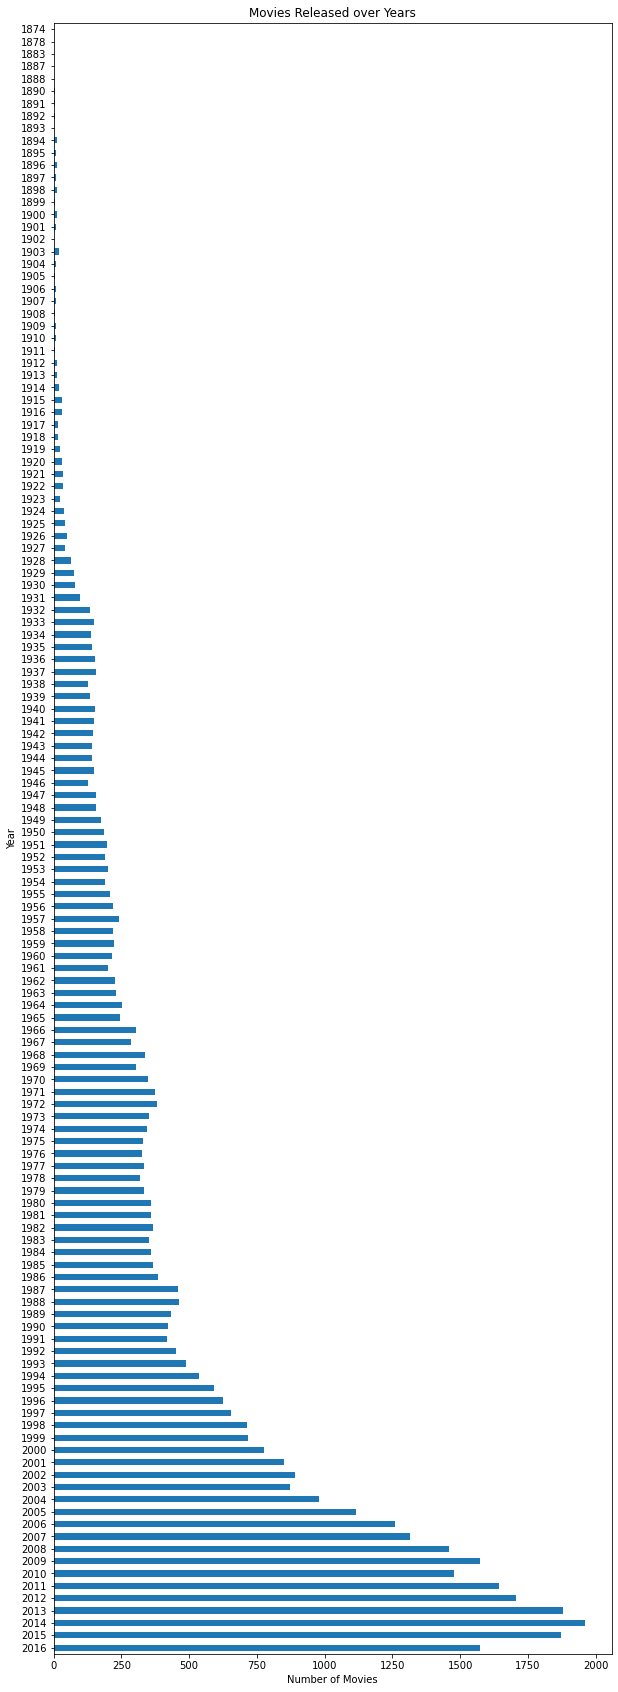

In [77]:
plt.figure(figsize=(10,30))
df_temp = df_movies[df_movies['RELEASE_YEAR'] < '2017'][['MOVIE_ID', 'RELEASE_YEAR', 'RELEASE_MONTH']]
df_temp['RELEASE_YEAR'].value_counts().sort_index(ascending=False).plot(kind = 'barh')
plt.title('Movies Released over Years')
plt.xlabel('Number of Movies')
plt.ylabel('Year')
plt.show()

#### I notice that number of movies released in a year have been increasing every year over time from 1874 to 2016.

In [78]:
# pd.set_option('display.max_rows', None)

df_temp = pd.merge(df_temp, df_genres, on='MOVIE_ID')
df_temp.groupby(['GENRES', 'RELEASE_YEAR'])['MOVIE_ID'].count()

GENRES   RELEASE_YEAR
Action   1891             1
         1900             1
         1903             2
         1906             1
         1909             1
                         ..
Western  2012             8
         2013             9
         2014            14
         2015            13
         2016            10
Name: MOVIE_ID, Length: 1986, dtype: int64

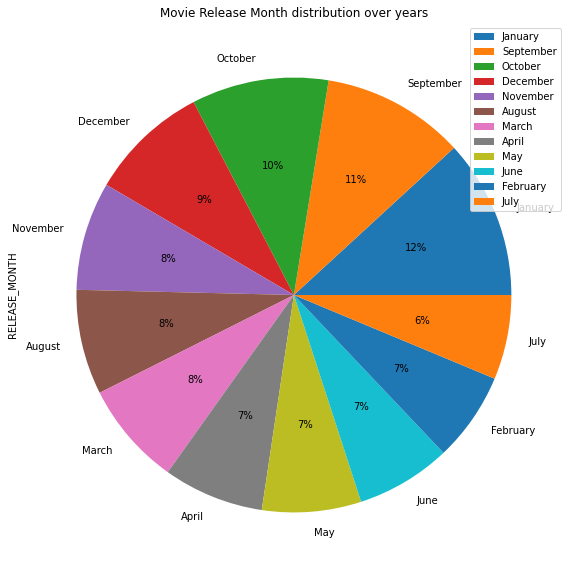

In [79]:
plt.figure(figsize=(10,10))
df_temp['RELEASE_MONTH'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Movie Release Month distribution over years')
plt.legend(loc=1)
plt.show()

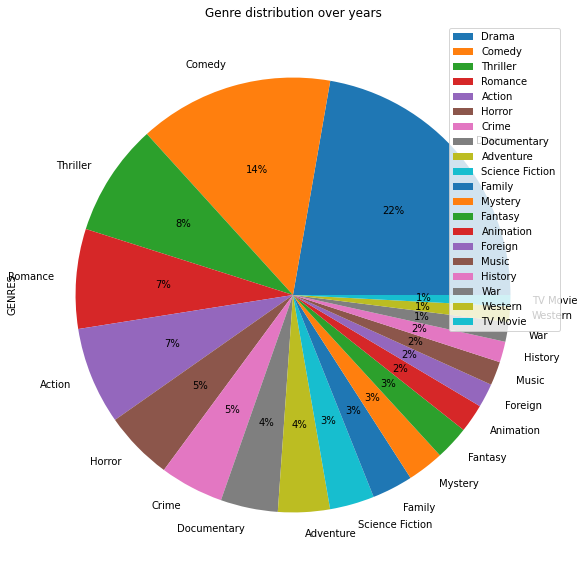

In [80]:
plt.figure(figsize=(10,10))
df_temp['GENRES'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Genre distribution over years')
plt.legend(loc=1)
plt.show()

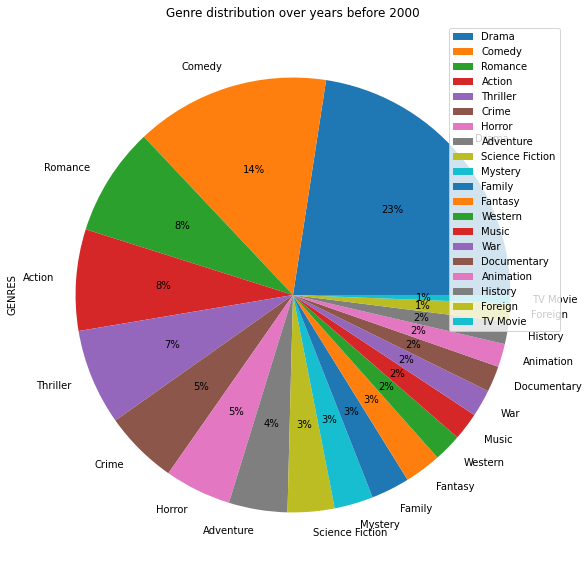

In [81]:
plt.figure(figsize=(10,10))
df_temp[df_temp['RELEASE_YEAR'] < '2000']['GENRES'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Genre distribution over years before 2000')
plt.legend(loc=1)
plt.show()

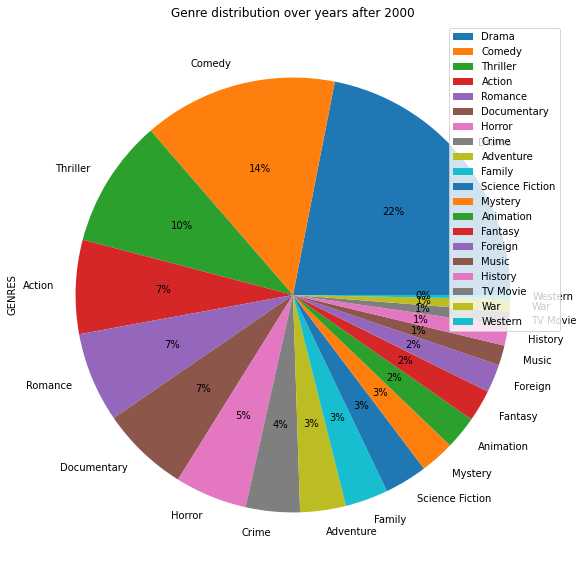

In [82]:
plt.figure(figsize=(10,10))
df_temp[df_temp['RELEASE_YEAR'] > '2000']['GENRES'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Genre distribution over years after 2000')
plt.legend(loc=1)
plt.show()

#### Drama, Comedy and Thriller are always the top three genres

#### Runtime

In [83]:
df_movies['RUNTIME'].describe()

count    43238.000000
mean        97.530482
std         34.709439
min          1.000000
25%         86.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: RUNTIME, dtype: float64

#### Most of the movies in our dataset are roughly of 90 minutes

#### Language

In [84]:
df_movies['LANGUAGE'].value_counts()

English               31935
French                 2416
Italian                1511
Japanese               1339
German                 1073
                      ...  
Latin                     1
Western Frisian           1
Kinyarwanda               1
Tajik                     1
Sinhala; Sinhalese        1
Name: LANGUAGE, Length: 88, dtype: int64

In [85]:
df_movies['LANGUAGE'].nunique()

88

#### There are movies belonging to 88 distinct languages in our dataset with most of them belonging to English followed by French and Italian

#### Budget, Revenue and Production Company

#### Note : Roughly 80% of rows do not contain budget/revenue information, the following analysis is based on the available data only

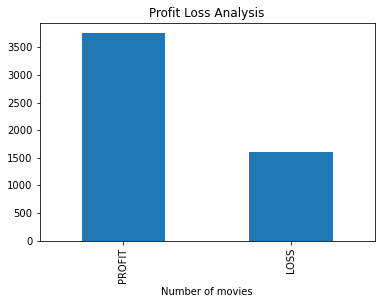

In [86]:
df_temp = df_movies[df_movies['PROFIT/LOSS'] != ""][['MOVIE_ID', 'BUDGET', 'REVENUE', 'PROFIT_LOSS', 'PROFIT_LOSS_PCT', 'PROFIT/LOSS']]
df_temp['PROFIT/LOSS'].value_counts().plot(kind='bar')
plt.xlabel('Number of movies')
plt.title('Profit Loss Analysis')
plt.show()

In [87]:
df_movies[['BUDGET', 'REVENUE', 'PROFIT_LOSS']].describe()

,BUDGET,REVENUE,PROFIT_LOSS
count,8.855000e+03,7.385000e+03,5.351000e+03
mean,2.166746e+07,6.896865e+07,5.954819e+07
std,3.435865e+07,1.466090e+08,1.398569e+08
min,1.000000e+00,1.000000e+00,-1.657101e+08
25%,2.000000e+06,2.405420e+06,-1.499031e+06
50%,8.200000e+06,1.687267e+07,1.124486e+07
75%,2.500000e+07,6.764269e+07,6.306340e+07
max,3.800000e+08,2.787965e+09,2.550965e+09


#### I see that among the movies for which the data is available, average movie budget is 21 million with most of them making profits

In [88]:
print('Most profitable movie')
df_movies[df_movies['PROFIT_LOSS'] == df_temp['PROFIT_LOSS'].max()]

Most profitable movie


,MOVIE_ID,TITLE,RELEASE_DATE,RELEASE_YEAR,RELEASE_MONTH,RUNTIME,LANGUAGE,STATUS,ADULT,BUDGET,REVENUE,PROFIT_LOSS,PROFIT_LOSS_PCT,PROFIT/LOSS,POPULARITY,POPULARITY_BUCKET,VOTE_COUNT,VOTE_AVERAGE
14546,19995,Avatar,2009-12-10,2009,December,162.0,English,Released,True,237000000.0,2.787965e+09,2.550965e+09,1076.356577,PROFIT,185.070892,5,12114.0,7.2


In [89]:
print('Most loss making movie')
df_movies[df_movies['PROFIT_LOSS'] == df_temp['PROFIT_LOSS'].min()]

Most loss making movie


,MOVIE_ID,TITLE,RELEASE_DATE,RELEASE_YEAR,RELEASE_MONTH,RUNTIME,LANGUAGE,STATUS,ADULT,BUDGET,REVENUE,PROFIT_LOSS,PROFIT_LOSS_PCT,PROFIT/LOSS,POPULARITY,POPULARITY_BUCKET,VOTE_COUNT,VOTE_AVERAGE
21162,57201,The Lone Ranger,2013-07-03,2013,July,149.0,English,Released,True,255000000.0,89289910.0,-165710090.0,-64.984349,LOSS,12.729104,5,2361.0,5.9


In [90]:
df_temp = pd.merge(df_temp, df_genres, on='MOVIE_ID')
df_temp.groupby(['GENRES', 'PROFIT/LOSS'], as_index=False)['MOVIE_ID'].count()

,GENRES,PROFIT/LOSS,MOVIE_ID
0,Action,LOSS,395
1,Action,PROFIT,1013
2,Adventure,LOSS,230
3,Adventure,PROFIT,727
4,Animation,LOSS,65
5,Animation,PROFIT,227
6,Comedy,LOSS,525
7,Comedy,PROFIT,1322
8,Crime,LOSS,257
9,Crime,PROFIT,601


In [91]:
df_movies['BUDGET'] = df_movies['BUDGET'].replace(np.nan, 0)
df_movies['REVENUE'] = df_movies['REVENUE'].replace(np.nan, 0)
df_movies['PROFIT_LOSS'] = df_movies['PROFIT_LOSS'].replace(np.nan, 0)

df_movies['BUDGET'] = df_movies['BUDGET'].astype(int)
df_movies['REVENUE'] = df_movies['REVENUE'].astype(int)
df_movies['PROFIT_LOSS'] = df_movies['PROFIT_LOSS'].astype(int)


df_movies['BUDGET'] = df_movies['BUDGET'].apply(lambda x: numerize.numerize(x))
df_movies['REVENUE'] = df_movies['REVENUE'].apply(lambda x: numerize.numerize(x))
df_movies['PROFIT_LOSS'] = df_movies['PROFIT_LOSS'].apply(lambda x: numerize.numerize(x))
df_movies[['BUDGET', 'REVENUE', 'PROFIT_LOSS']]

,BUDGET,REVENUE,PROFIT_LOSS
0,30M,373.55M,343.55M
1,65M,262.8M,197.8M
2,0,0,0
3,16M,81.45M,65.45M
4,0,76.58M,0
...,...,...,...
45428,0,0,0
45429,0,0,0
45430,0,0,0
45431,0,0,0


#### Cast and Crew

In [92]:
df_cast['NAME'].nunique(), df_crew['NAME'].nunique()

(202747, 157614)

#### Our dataset contain information for over 200k and 157k cast and crew members

In [93]:
df_cast['NAME'].value_counts().reset_index().sort_values('NAME', ascending=False).head(10)

,index,NAME
0,Bess Flowers,241
1,Christopher Lee,148
2,John Wayne,125
3,Samuel L. Jackson,123
4,Gérard Depardieu,110
5,Michael Caine,110
6,John Carradine,109
7,Donald Sutherland,108
8,Jackie Chan,108
9,Frank Welker,107


In [94]:
df_crew['NAME'].value_counts().reset_index().sort_values('NAME', ascending=False).head(10)

,index,NAME
0,Cedric Gibbons,272
1,Avy Kaufman,184
2,Edith Head,165
3,Roger Corman,155
4,Ennio Morricone,153
5,Max Steiner,150
6,Kerry Barden,148
7,Charlie Chaplin,142
8,Mary Vernieu,142
9,Mel Berns,142


In [95]:
df_crew['DEPARTMENT'].unique()

array(['Directing', 'Writing', 'Production', 'Editing', 'Art', 'Sound',
       'Visual Effects', 'Crew', 'Lighting', 'Camera',
       'Costume & Make-Up', 'Actors'], dtype=object)

## Thank You!